In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv("wine.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

norm = MinMaxScaler(feature_range=(0, 1))
X = norm.fit_transform(X)

In [14]:
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)

In [15]:
som.random_weights_init(X)

In [16]:
som.train_random(data=X, num_iteration=100)

In [35]:
W = som.get_weights()
som._activation_map
q = som.activation_response(X)
som._weights

array([[[0.41619617, 0.39449386, 0.50685798, 0.4422608 , 0.28651455,
         0.62779354, 0.50350414, 0.5263484 , 0.54477405, 0.19242564,
         0.67435595, 0.63823686, 0.28429463],
        [0.72914786, 0.57451979, 0.52076754, 0.31312334, 0.38252807,
         0.62951827, 0.53988429, 0.23959452, 0.4316248 , 0.29844888,
         0.37657397, 0.72298876, 0.47053241],
        [0.53371796, 0.32082308, 0.51228125, 0.37102385, 0.25630737,
         0.44474728, 0.24429873, 0.66662266, 0.3169272 , 0.33613626,
         0.26874899, 0.34012126, 0.33540481],
        [0.28051343, 0.34827867, 0.83688038, 0.7920189 , 0.41270368,
         0.60188459, 0.75799137, 0.68549201, 0.42792331, 0.3603494 ,
         0.35878113, 0.70381793, 0.17784128],
        [0.58224813, 0.24425604, 0.54544019, 0.43512895, 0.31209432,
         0.43000405, 0.42551836, 0.58164702, 0.43839386, 0.20401329,
         0.59252411, 0.53116227, 0.40113876],
        [0.2678605 , 0.33046249, 0.48202195, 0.54613877, 0.20415451,
         0.

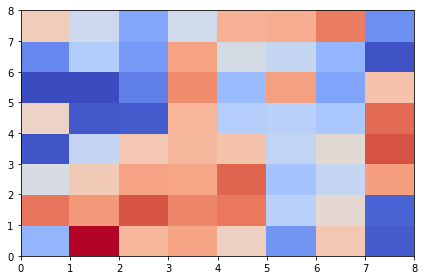

In [38]:
plt.pcolor(W[:,:,0].T, cmap='coolwarm')
plt.xticks(np.arange(8+1))
plt.yticks(np.arange(8+1))
plt.tight_layout()

/home/adriano/.cache/pypoetry/virtualenvs/brazil_lightning_analyze-L9jCjqLF-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  


(0.0, 8.0)

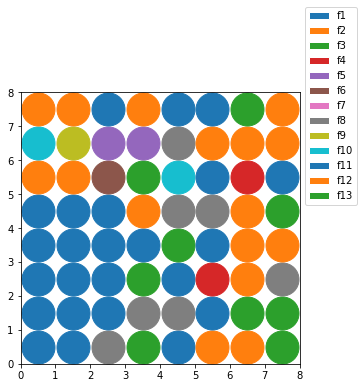

In [47]:
feature_names = ['f%d'%(i+1) for i in range(13)]
Z = np.zeros((8, 8))
plt.figure(figsize=(5, 5))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='o', markersize=33)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, 8])
plt.ylim([0, 8])